In [35]:
# Team Members: Dhruv Acharya, Alex Neuman

from __future__ import print_function, division
% matplotlib inline
from thinkbayes2 import Hist, Pmf, Suite

### 2.1 Cookie Problem
We define an arbitrary number of cookies in each bowl, such that the probability of picking a vanilla cookie from bowl 1 is 3/4 and the probablity from bowl 2 is 1/2.
We will itirate over these objects in order to update the probabilities of picking either a chocolate or vanilla cookie as we remove more cookies from the bowls.

In [38]:
bowl1 = Hist(dict(vanilla=30, chocolate=10))
bowl2 = Hist(dict(vanilla=20, chocolate=20))

bowl1.Print()

chocolate 10
vanilla 30


Initial probablity is set to .5 for each bowl

In [39]:
pmf = Pmf([bowl1, bowl2])
pmf.Print()

Hist({'vanilla': 30, 'chocolate': 10}) 0.5
Hist({'vanilla': 20, 'chocolate': 20}) 0.5


The likelihood function here gives us the probablity of the hypothesis of the cookie of choice.
Futhermore it subtracts a value of 1 from each bowl, for the specified hypothesis (ie. Vanilla or Chocolate).

In [40]:
def likelihood(hypo, data):
    like = hypo[data] / hypo.Total()
    if like:
        hypo[data] -= 1
    return like

The update function takes the hypothesis of choice and computes a new probability mass function by passing the likelihood function as an instance method.

Note, the normalized method that is applied insuring that now have a true probability distribution (ie. it adds up to 1).

In [41]:
def update(pmf, data):
    for hypo in pmf:
        pmf[hypo] *= likelihood(hypo, data)
    return pmf.Normalize()

Once the function is ran, we can see that the hypothesized cookie (vanilla), was reduced by 1 in each of our bowls. 

In [42]:
update(pmf, 'vanilla')
pmf.Print()

Hist({'vanilla': 29, 'chocolate': 10}) 0.6000000000000001
Hist({'vanilla': 19, 'chocolate': 20}) 0.4


In [21]:
for i in range(10):
    update(pmf, 'chocolate')
    print(pmf[bowl1])

0.4285714285714286
0.2621359223300971
0.13636363636363635
0.06104651162790699
0.023800528900642243
0.008061420345489446
0.002316602316602318
0.0005355548943766738
8.929900282780178e-05
8.118750253710948e-06


### Discussion
Here we've run 10 scenarios of the hypothesis (Chocolate), and we see that over time the probablity of picking a chocolate cookie from bowl 1 deminishes to zero.

This is interesting because, although we dont know which bowl the cookie was picked from, the likelihood of picking a chocolate cookie from bowl 1 on our eleventh pick is now virtually zero.

### 3.1 Locomotive Problem

In the original problem, the probablity distribution was uniform due to us only concentrating on one train company. Now however, with the introduction of multiple train companies our prior distribution is no longer uniformly distributed and thus our posterior probablity given the train car labled 60 must be updated to reflect this change. 

The probability of a numbered train car (in this case 60) is dependent on how many of those number train cars exist in each train companies' fleet. 

With this in mind we treat this problem similarly to the cookie problem from Ch2 and utilize both the likelihood and update functions so that the probablity of an observed train car being from a given company is dependent on the number of that specific train car that exists in the entire system.


### 4.1 Euro (Coin Flip)

In order to solve this exercise, the only thing that needs to be added is an error factor to represent the sensor's unreliability. This will weight the probability of each hypothesis by a factor of "y", in which y is equal to a uniform distribution of 0-100 (ie our original data's prior distribution).

We loop through every hypothesis, multiplied by an error coefficient (y), and plot our distributions accordingly. 

### Code Source:
Think Bayes2, Author AllenDowney

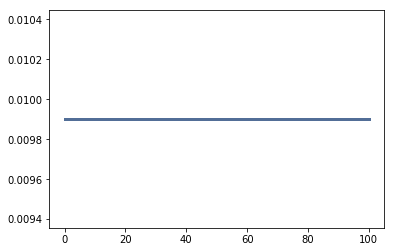

In [46]:
# Solution

# Here's a class that models an unreliable coin

class UnreliableCoin(Suite):
    
    def __init__(self, prior, y):
        """
        prior: seq or map
        y: probability of accurate measurement
        """
        Suite.__init__(self, prior)
        self.y = y
    
    def Likelihood(self, data, hypo):
        """
        data: outcome of unreliable measurement, either 'H' or 'T'
        hypo: probability of heads, 0-100
        """
        x = hypo / 100
        y = self.y
        if data == 'H':
            return x*y + (1-x)*(1-y)
        else:
            return x*(1-y) + (1-x)*y# Solution

# Now let's initialize one with `y=0.9`:

prior = range(0, 101)
suite = UnreliableCoin(pr# Solution

# And update with 3 heads and 7 tails.

for outcome in 'HHHTTTTTTT':
    suite.Update(outcome)
    
thinkplot.Pdf(suite)# Solution

# And update with 3 heads and 7 tails.

for outcome in 'HHHTTTTTTT':
    suite.Update(outcome)
    
thinkplot.Pdf(suite)ior, y=0.9)
thinkplot.Pdf(suite)

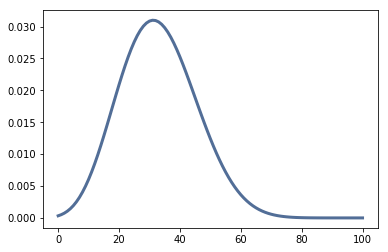

In [48]:
# Solution

# And update with 4 heads and 6 tails.

for outcome in 'HHHHTTTTTT':
    suite.Update(outcome)
    
thinkplot.Pdf(suite)

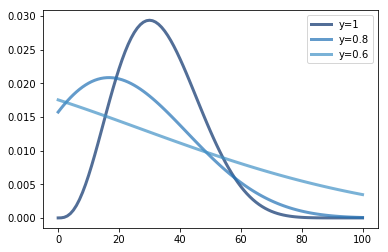

In [49]:
# Solution

# Now let's try it out with different values of `y`:

def compute_prior(y):
    prior = range(0, 101)
    suite = UnreliableCoin(prior, y=y)
    for outcome in 'HHHTTTTTTT':
        suite.Update(outcome)
    
    thinkplot.Pdf(suite, label='y=%g' % y)

    # Solution

# The posterior distribution gets wider as the measurement gets less reliable.

compute_prior(1)
compute_prior(0.8)
compute_prior(0.6)
thinkplot.config(legend=True)

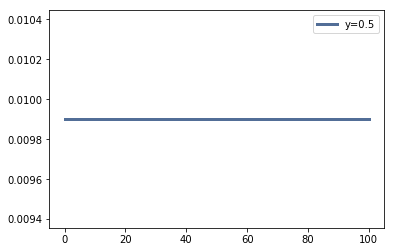

In [50]:

# Solution

# At `y=0.5`, the measurement provides no information, so the posterior equals the prior:

compute_prior(0.5)
thinkplot.config(legend=True)

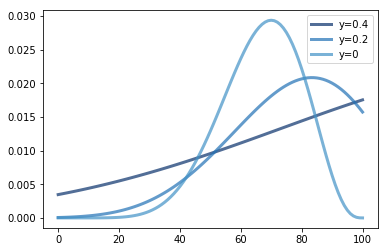

In [53]:
#Solution

# As the coin gets less reliable (below `y=0.5`) the distribution gets narrower again.  
# In fact, a measurement with `y=0` is just as good as one with `y=1`, 
# provided that we know what `y` is.

compute_prior(0.4)
compute_prior(0.2)
compute_prior(0.0)
thinkplot.config(legend=True)

This question brings up an excellent point that we know the inaccuracy of the coin. (error factor y = .9) This is not the case in many case studies, where the error is unknown, and it must be found using data.